In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.preprocessing as preprocessing

In [2]:
# load dataset
train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None, index_col=None)
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data.columns = names
#filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#df = pd.read_csv(filename, sep=',', header=None, index_col=None, names=names)
#array = dataframe.values


In [3]:
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep=',', header=None, index_col=None, skiprows=[0])
test_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [4]:
del train_data["education"]
del test_data["education"]
del train_data["native-country"]
del test_data["native-country"]

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [5]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

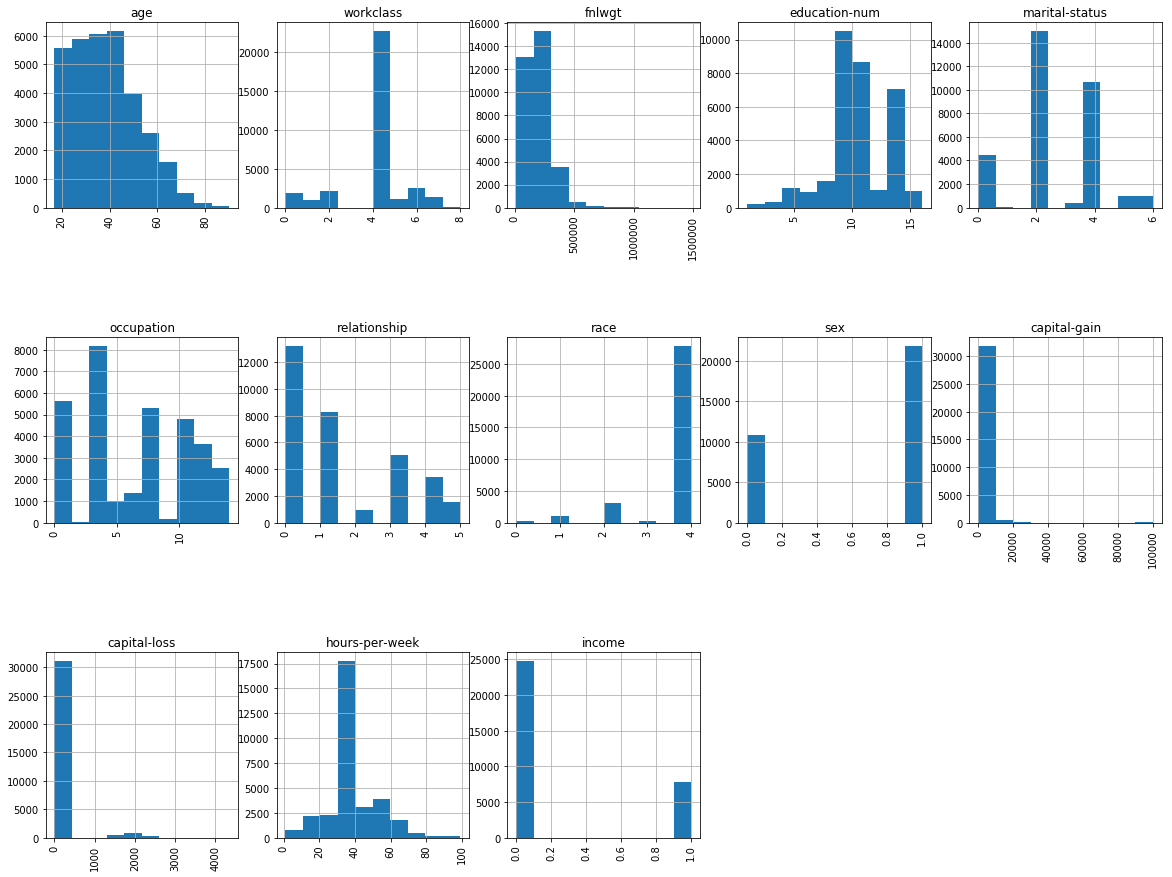

In [6]:
encoded_data, encoders = number_encode_features(train_data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [ ]:
encoders

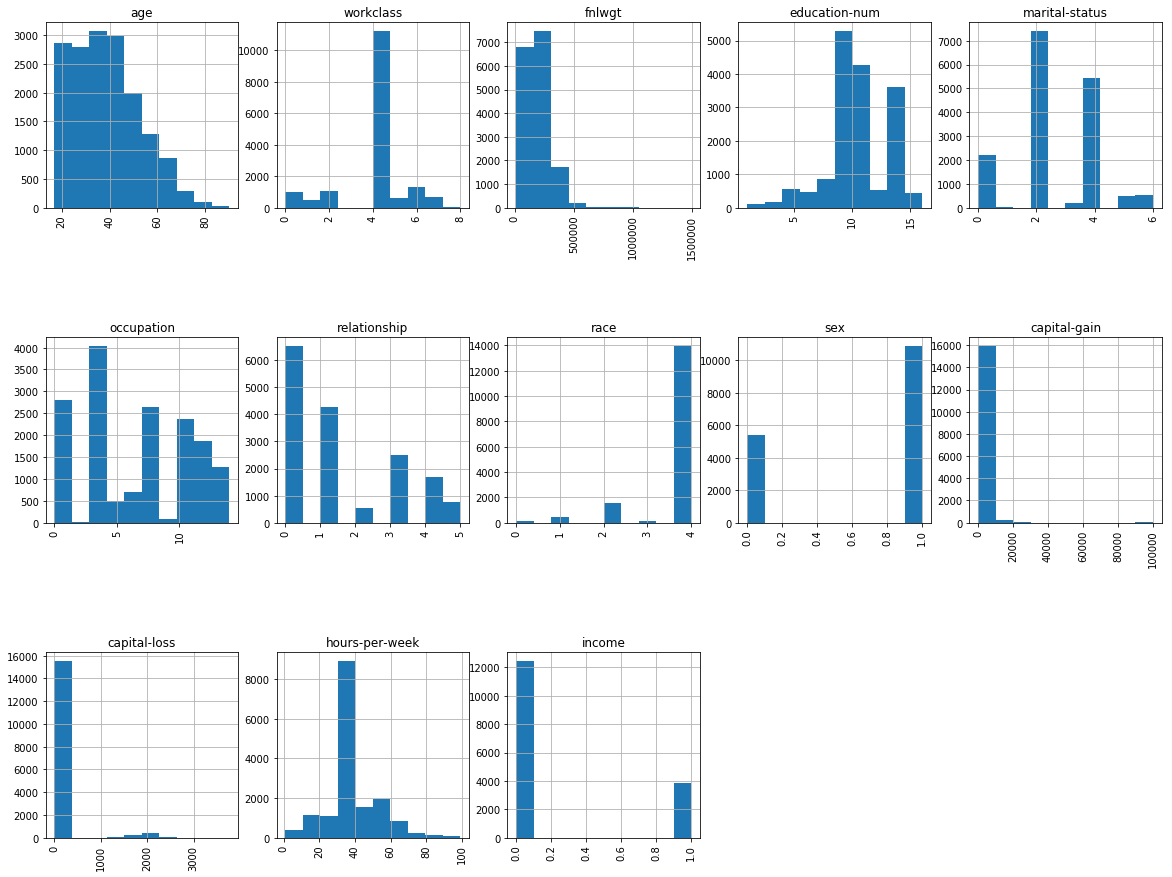

In [7]:
encoded_test, encoders_test = number_encode_features(test_data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = np.ceil(float(encoded_test.shape[1]) / cols)
for i, column in enumerate(encoded_test.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_test[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [ ]:
encoders_test

In [ ]:
encoded_data.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
type(encoded_data)


In [8]:
array1 = encoded_data.values
X_train = array1[:, :-1]
y_train = array1[:, -1]

In [9]:
array2 = encoded_test.values
X_test = array2[:, :-1]
y_test = array2[:, -1]

In [10]:
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

In [12]:
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train_s, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.825036 (0.005045)
LDA: 0.813182 (0.006420)
KNN: 0.833513 (0.006222)
CART: 0.811124 (0.003746)
NB: 0.801265 (0.005341)
SVM: 0.849636 (0.006396)


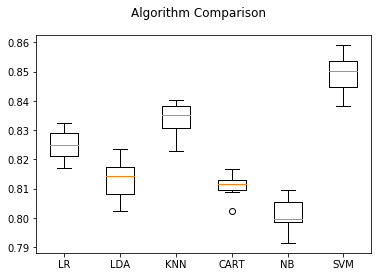

In [13]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
cls = LogisticRegression(random_state=0).fit(X_train_s, y_train)
y_pred = cls.predict(X_test_s)

In [16]:
from sklearn.metrics import confusion_matrix
score = cls.score(X_test_s, y_test)
print(score)

0.8245807997051778


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11695   740]
 [ 2116  1730]]


In [20]:
cls_svm = SVC(random_state=0).fit(X_train_s, y_train)
y_svm_pred = cls_svm.predict(X_test_s)
svm_score = cls_svm.score(X_test_s, y_test)
print(svm_score)

0.8509305325225723


In [22]:
cm_svm = confusion_matrix(y_test, y_svm_pred)
print(cm_svm)

[[11777   658]
 [ 1769  2077]]


In [24]:
import sklearn.metrics as metrics

In [27]:
names_ref = ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

F1 score: 0.547815


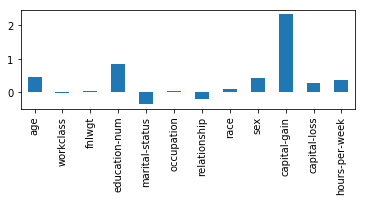

In [29]:
ms1 = "F1 score: %f" % metrics.f1_score(y_test, y_pred)
print(ms1)
coefs = pd.Series(cls.coef_[0], index=names_ref)
#coefs.sort()
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()